1.Load Dataset & Basic Info

In [ ]:
import pandas as pd

# load dataset
df = pd.read_csv("Hospital_OPD_Queue_Dataset.csv")

# convert arrival_time to datetime
df['arrival_time_dt'] = pd.to_datetime(df['arrival_time'], format='%I:%M %p')

# preview
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nNumber of patients:", len(df))
print("Patient type counts:\n", df['patient_type'].value_counts())


First 5 rows:
   patient_id patient_type arrival_time  waiting_time  service_time  \
0           1       normal      7:01 AM           0.0          9.96   
1           2        staff      7:03 AM           0.0          8.46   
2           3   lab_report      7:09 AM           0.0          6.59   
3           4   lab_report      7:09 AM           0.0          4.57   
4           5       normal      7:10 AM           0.0         17.60   

  assign_doctor     arrival_time_dt  
0          Dr_1 1900-01-01 07:01:00  
1          Dr_2 1900-01-01 07:03:00  
2          Dr_3 1900-01-01 07:09:00  
3          Dr_4 1900-01-01 07:09:00  
4          Dr_5 1900-01-01 07:10:00  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   patient_id       200 non-null    int64         
 1   patient_type     200 non-null    object        


2.Average Waiting Time & Service Time

In [ ]:
# basic statistics
avg_waiting_time = df['waiting_time'].mean()
avg_service_time = df['service_time'].mean()

print(f"Average Waiting Time: {avg_waiting_time:.2f} minutes")
print(f"Average Service Time: {avg_service_time:.2f} minutes")

# waiting time by patient type
waiting_by_type = df.groupby('patient_type')['waiting_time'].mean()
print("\nAverage Waiting Time by Patient Type:")
print(waiting_by_type)


Average Waiting Time: 68.68 minutes
Average Service Time: 10.41 minutes

Average Waiting Time by Patient Type:
patient_type
lab_report      2.7155
normal        104.3370
staff           2.1440
Name: waiting_time, dtype: float64


Visualization: Waiting Time Distribution

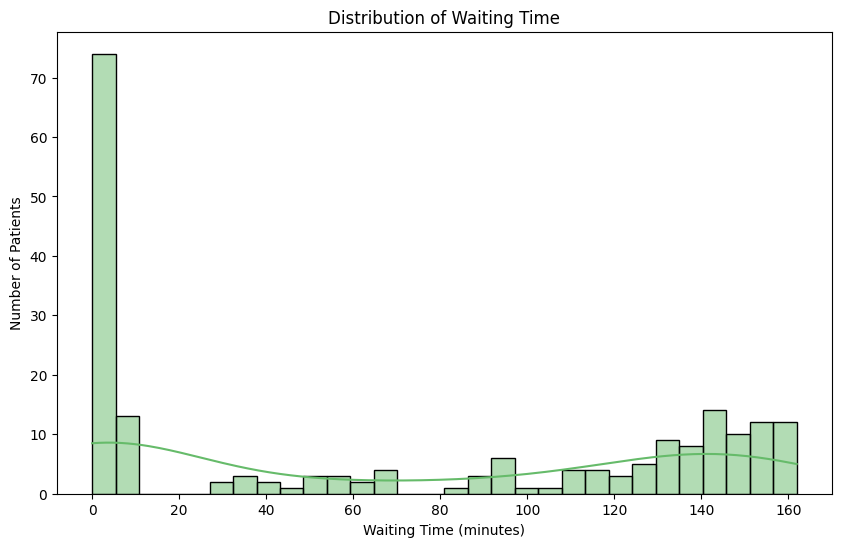

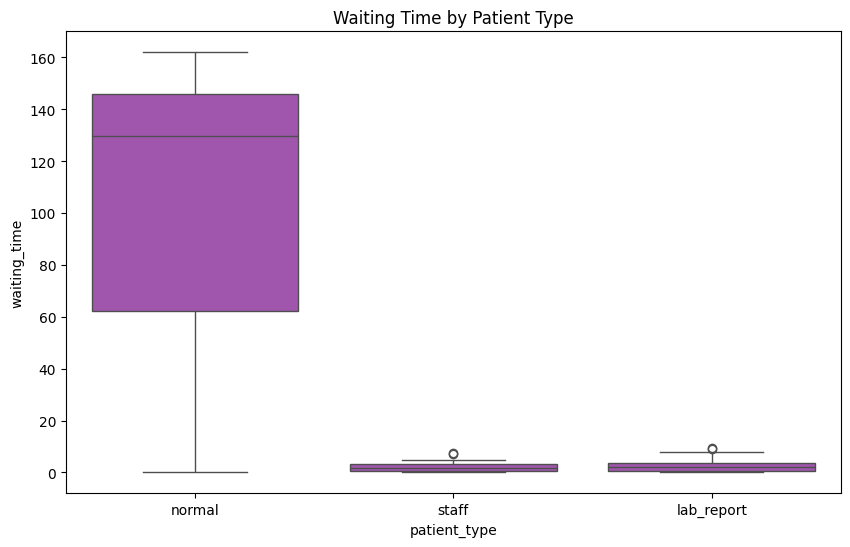

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['waiting_time'], bins=30, kde=True, color='#66BB6A')
plt.title("Distribution of Waiting Time")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Number of Patients")
plt.show()

# Waiting time by patient type
plt.figure(figsize=(10,6))
sns.boxplot(x='patient_type', y='waiting_time', data=df, color='#AB47BC')
plt.title("Waiting Time by Patient Type")
plt.show()


3.Throughput Analysis

In [ ]:
# throughput = total patients / session duration (in hours)
session_start = df['arrival_time_dt'].min()
session_end = df['arrival_time_dt'].max()
session_hours = (session_end - session_start).total_seconds() / 3600

throughput = len(df) / session_hours
print(f"Total Patients Served: {len(df)}")
print(f"Session Duration: {session_hours:.2f} hours")
print(f"Throughput (patients/hour): {throughput:.2f}")


Total Patients Served: 200
Session Duration: 4.95 hours
Throughput (patients/hour): 40.40


Visualization: Patients Over Time

C:\Users\dinek\AppData\Local\Temp\ipykernel_99624\1140101751.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.set_index('arrival_time_dt').resample('15T').count()['patient_id']


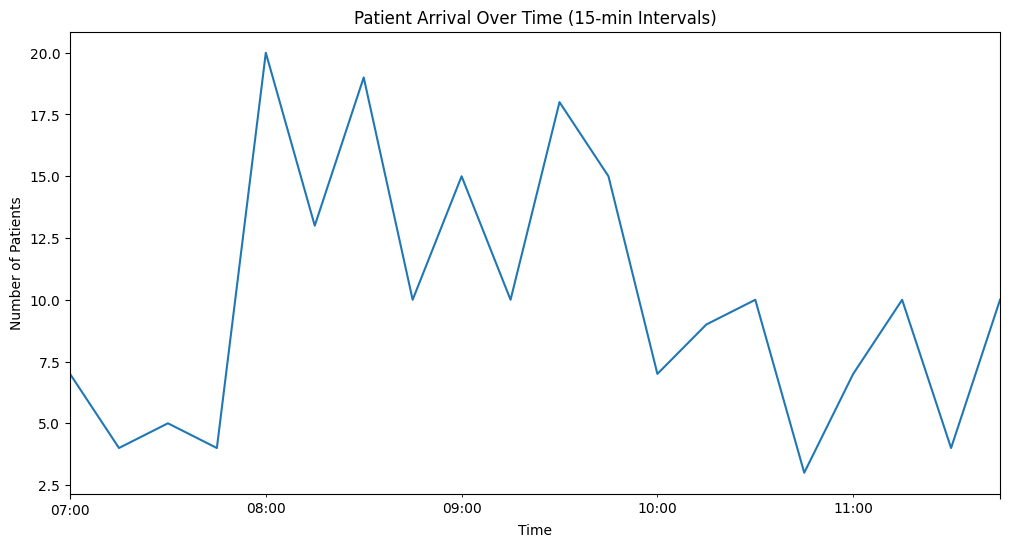

In [6]:
plt.figure(figsize=(12,6))
df_resampled = df.set_index('arrival_time_dt').resample('15T').count()['patient_id']
df_resampled.plot(kind='line')
plt.title("Patient Arrival Over Time (15-min Intervals)")
plt.ylabel("Number of Patients")
plt.xlabel("Time")
plt.show()


4.Doctor Utilization

In [ ]:
# total session duration in minutes
total_session_time = session_hours * 60

doctor_busy_time = df.groupby('assign_doctor')['service_time'].sum()
doctor_utilization = (doctor_busy_time / total_session_time) * 100

print("Doctor Busy Time (minutes):")
print(doctor_busy_time)
print("\nDoctor Utilization (%):")
print(doctor_utilization)


Doctor Busy Time (minutes):
assign_doctor
Dr_1    433.73
Dr_2    427.52
Dr_3    422.11
Dr_4    407.61
Dr_5    390.09
Name: service_time, dtype: float64

Doctor Utilization (%):
assign_doctor
Dr_1    146.037037
Dr_2    143.946128
Dr_3    142.124579
Dr_4    137.242424
Dr_5    131.343434
Name: service_time, dtype: float64


Visualization: Doctor Utilization

C:\Users\dinek\AppData\Local\Temp\ipykernel_99624\2191704338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=doctor_utilization.index, y=doctor_utilization.values, palette=colors)


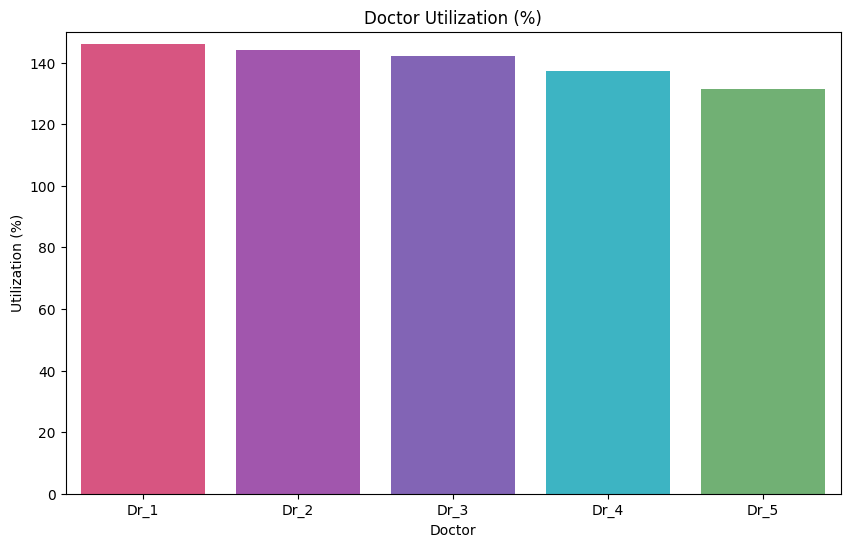

In [26]:
colors = ['#EC407A', '#AB47BC', '#7E57C2', '#26C6DA', '#66BB6A'] 

plt.figure(figsize=(10,6))
sns.barplot(x=doctor_utilization.index, y=doctor_utilization.values, palette=colors)
plt.title("Doctor Utilization (%)")
plt.ylabel("Utilization (%)")
plt.xlabel("Doctor")
plt.ylim(0, 150)
plt.show()


5.Peak Hour Analysis & Bottlenecks

In [ ]:
peak_start = pd.to_datetime("08:00 AM", format='%I:%M %p')
peak_end = pd.to_datetime("10:00 AM", format='%I:%M %p')

# filter for peak hours
df_peak = df[(df['arrival_time_dt'].dt.time >= peak_start.time()) & 
             (df['arrival_time_dt'].dt.time <= peak_end.time())]

# average waiting time during peak
peak_avg_wait = df_peak['waiting_time'].mean()
print(f"Average Waiting Time during Peak Hours: {peak_avg_wait:.2f} minutes")

# patients served per doctor during peak
peak_doctor_counts = df_peak['assign_doctor'].value_counts()
print("\nNumber of Patients served per doctor during peak hours:")
print(peak_doctor_counts)




Average Waiting Time during Peak Hours: 66.28 minutes

Number of Patients served per doctor during peak hours:
assign_doctor
Dr_5    27
Dr_4    24
Dr_3    24
Dr_2    23
Dr_1    22
Name: count, dtype: int64


visualization

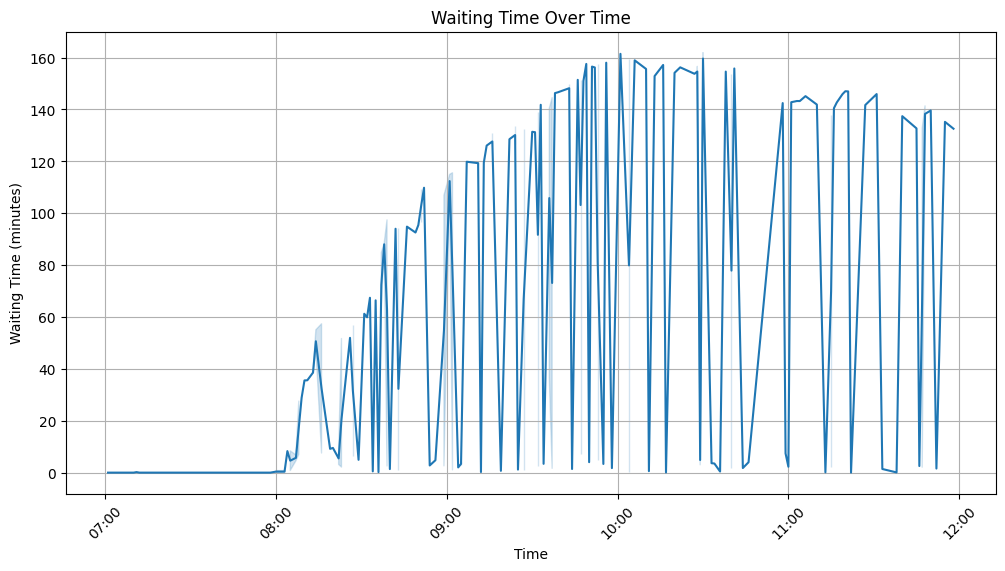

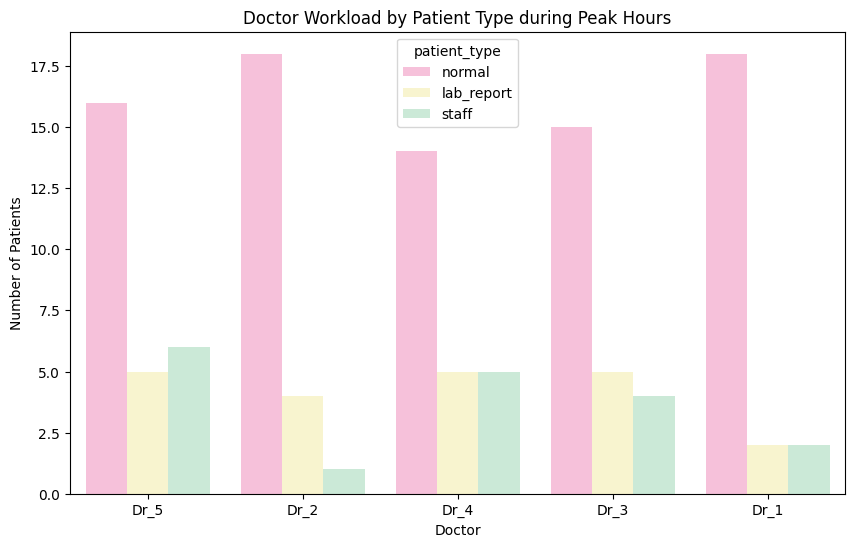

In [ ]:

import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_time_dt', y='waiting_time', data=df)

# format x-axis to show only hours and minutes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.title("Waiting Time Over Time")
plt.xlabel("Time")
plt.ylabel("Waiting Time (minutes)")
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()


# doctor workload by patient type during peak hours
colors = ['#FFB8D9', '#FFF9C8', '#C6EED6']
plt.figure(figsize=(10,6))
sns.countplot(x='assign_doctor', hue='patient_type', data=df_peak, palette=colors)
plt.title("Doctor Workload by Patient Type during Peak Hours")
plt.xlabel("Doctor")
plt.ylabel("Number of Patients")
plt.show()

throughput during peak hours


In [20]:
#throughput during peak hours
peak_session_hours = (peak_end - peak_start).total_seconds() / 3600
peak_throughput = len(df_peak) / peak_session_hours
print(f"Throughput during Peak Hours (patients/hour): {peak_throughput:.2f}")

Throughput during Peak Hours (patients/hour): 60.00


Visualization throuput in normal hours vs peak hours

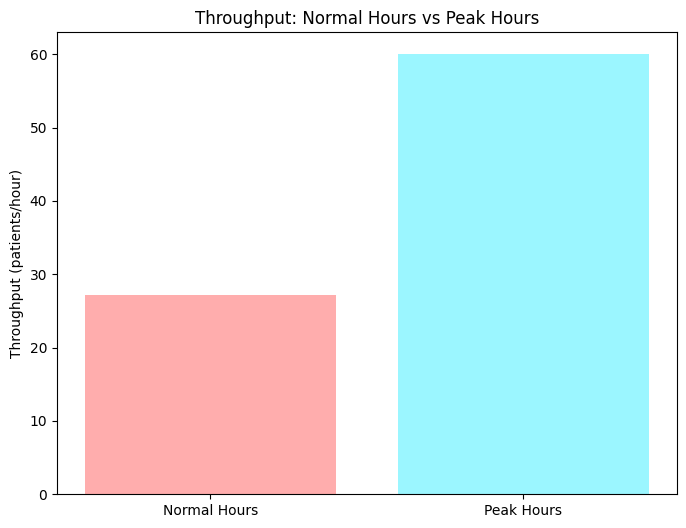

In [ ]:
#visualization throuput in normal hours vs peak hours
normal_throughput = (len(df) - len(df_peak)) / (session_hours - peak_session_hours)
labels = ['Normal Hours', 'Peak Hours']
throughputs = [normal_throughput, peak_throughput]
plt.figure(figsize=(8,6))
plt.bar(labels, throughputs, color=['#FFADAD', '#9BF6FF'])
plt.title("Throughput: Normal Hours vs Peak Hours")
plt.ylabel("Throughput (patients/hour)")
plt.show()


6. Summary Findings

In [ ]:
print("===== Summary of Findings =====")
print(f"Overall Average Waiting Time: {avg_waiting_time:.2f} minutes")
print(f"Overall Average Service Time: {avg_service_time:.2f} minutes")
print(f"Overall Throughput: {throughput:.2f} patients/hour")
print("\nDoctor Utilization (%):")
print(doctor_utilization)
print(f"Average Waiting Time During Peak Hours: {peak_avg_wait:.2f} minutes")




===== Summary of Findings =====
Overall Average Waiting Time: 68.68 minutes
Overall Average Service Time: 10.41 minutes
Overall Throughput: 40.40 patients/hour

Doctor Utilization (%):
assign_doctor
Dr_1    146.037037
Dr_2    143.946128
Dr_3    142.124579
Dr_4    137.242424
Dr_5    131.343434
Name: service_time, dtype: float64
Average Waiting Time During Peak Hours: 66.28 minutes
